### CAR PRICE PREDICTION

#### 1] Importing The Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loding the Diabetes dataset to Pandas Dataframe
data=pd.read_csv("cars.csv")

In [3]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
# Number of rows and columns in this dataset (rows,columns)
data.shape

(892, 6)

In [5]:
data.dtypes

name          object
company       object
year          object
Price         object
kms_driven    object
fuel_type     object
dtype: object

In [6]:
#Information about columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


**Creating Backup Copy**

In [7]:
backup=data.copy()

### 2] Cleaning The Data
#### Inconsistencies
- Names are pretty inconsistent.
- Names have company names attached to it.
- Some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'.
- Company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- Year has many non-year values.
- Year is in object. Change to integer.
- Price has Ask for Price.
- Price has commas in its prices and is in object.
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them.
- fuel_type has nan values.

**i) Year has many non-year values.**

In [8]:
data=data[data['year'].str.isnumeric()]

**ii) Price has Ask for Price.**

In [9]:
data=data[data['Price']!='Ask For Price']

**iii) Year is in object,Change it to integer.**

In [10]:
data['year']=data['year'].astype(int)

**iv) Price has commas in its prices and is in object.**

In [11]:
data['Price']=data['Price'].str.replace(',','').astype(int)

**v) kms_driven has object values with kms at last.**

In [12]:
data['kms_driven']=data['kms_driven'].str.split().str.get(0).str.replace(',','')

**vi) It has nan values and two rows have 'Petrol' in them.**

In [13]:
data=data[data['kms_driven'].str.isnumeric()]

In [14]:
data['kms_driven']=data['kms_driven'].astype(int)

**vii) fuel_type has nan values.**

In [15]:
data=data[~data['fuel_type'].isna()]

**viii) name and company had spammed data..but with the previous cleaning, those rows got removed.**

**ix) Company does not need any cleaning now. Changing car names. Keeping only the first three words.**

In [16]:
data['name']=data['name'].str.split().str.slice(0,3).str.join(' ')

**x) Resetting the index of the final cleaned data**

In [17]:
data=data.reset_index(drop=True)

### 3] CLeaned Data

In [18]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [19]:
data.shape

(816, 6)

In [20]:
data.dtypes

name          object
company       object
year           int32
Price          int32
kms_driven     int32
fuel_type     object
dtype: object

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [22]:
data=data[data['Price']<6000000]

**Creating new dataset of cleaned data**

In [23]:
data.to_csv('Cleaned_data.csv')

### 4] Cheking all the relationships 

**i) Company with Price**

In [24]:
data['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


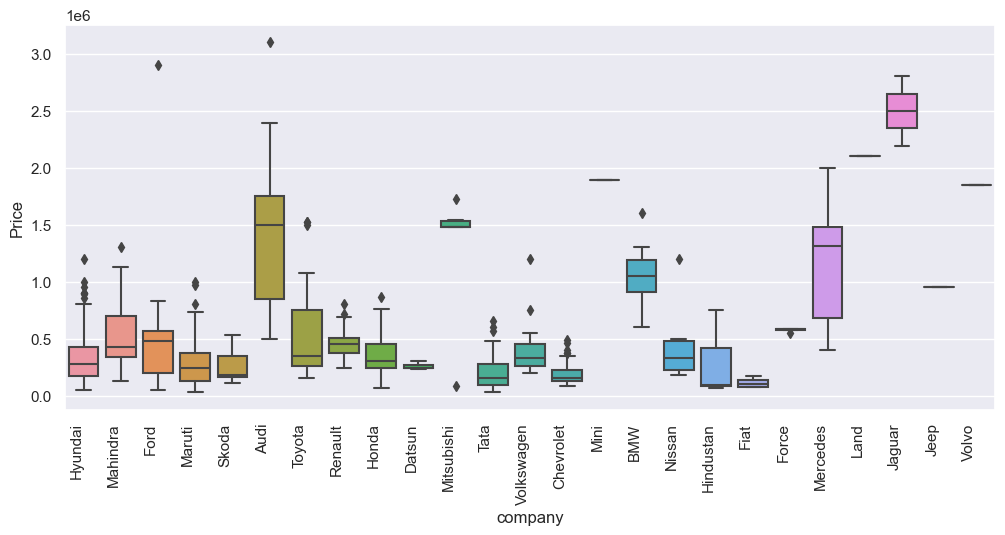

In [25]:
sns.set(style="darkgrid")
plt.subplots(figsize=(12,5))
ax=sns.boxplot(x='company',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')
plt.show()

**ii) Year with Price**

C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

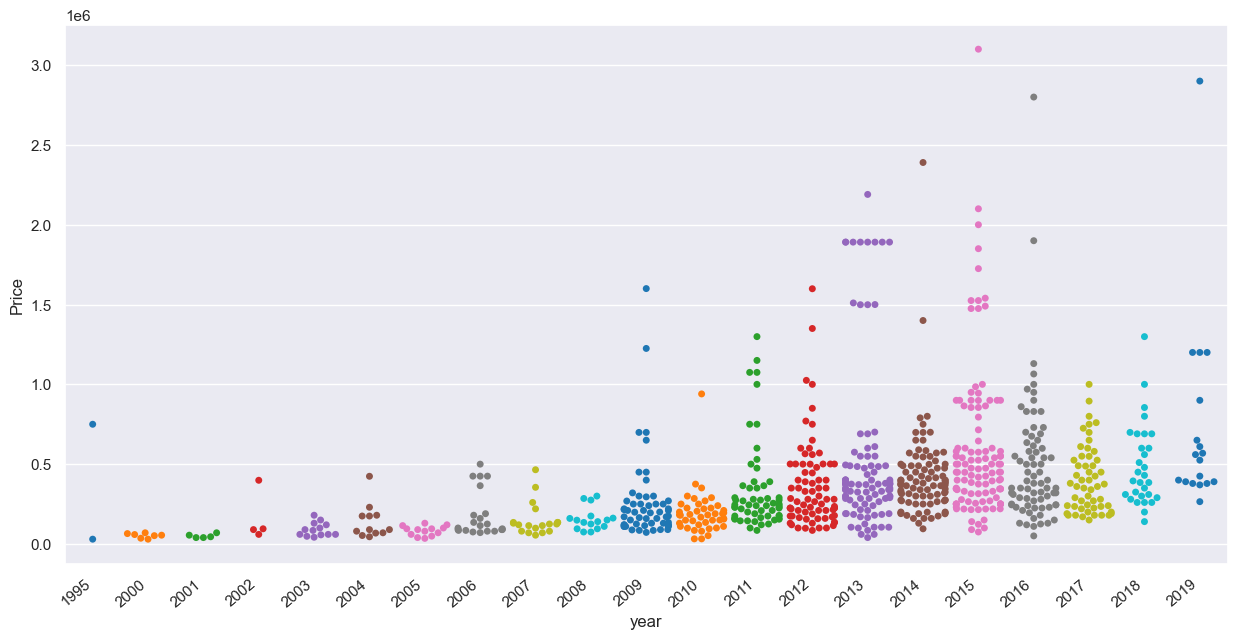

In [26]:
sns.set(style="darkgrid")
plt.subplots(figsize=(15,7))
ax=sns.swarmplot(x='year',y='Price',data=data,palette=("tab10"))
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

**iii) kms_driven with Price**

C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

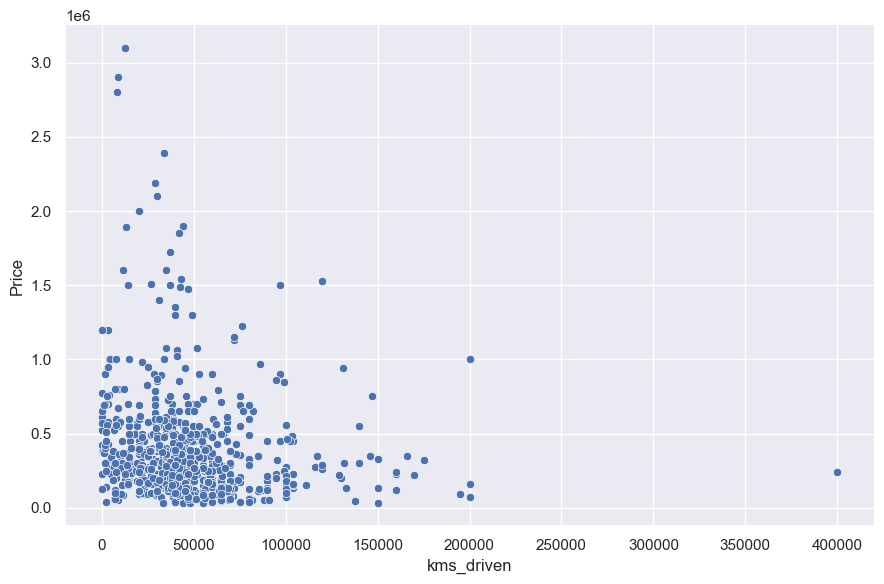

In [27]:
sns.relplot(x='kms_driven',y='Price',data=data,height=6,aspect=1.5);

**iv) Fuel Type with Price**

C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


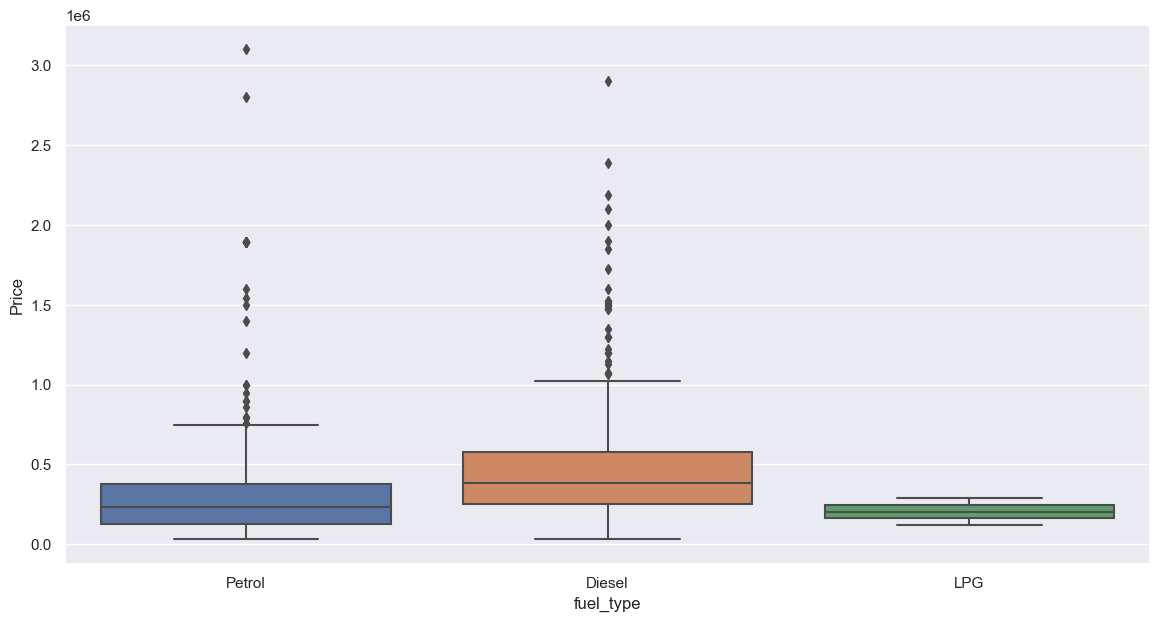

In [28]:
sns.set(style="darkgrid")
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=data);

**v) Price with fuel_type, Year and Company mixed**

C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaifm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

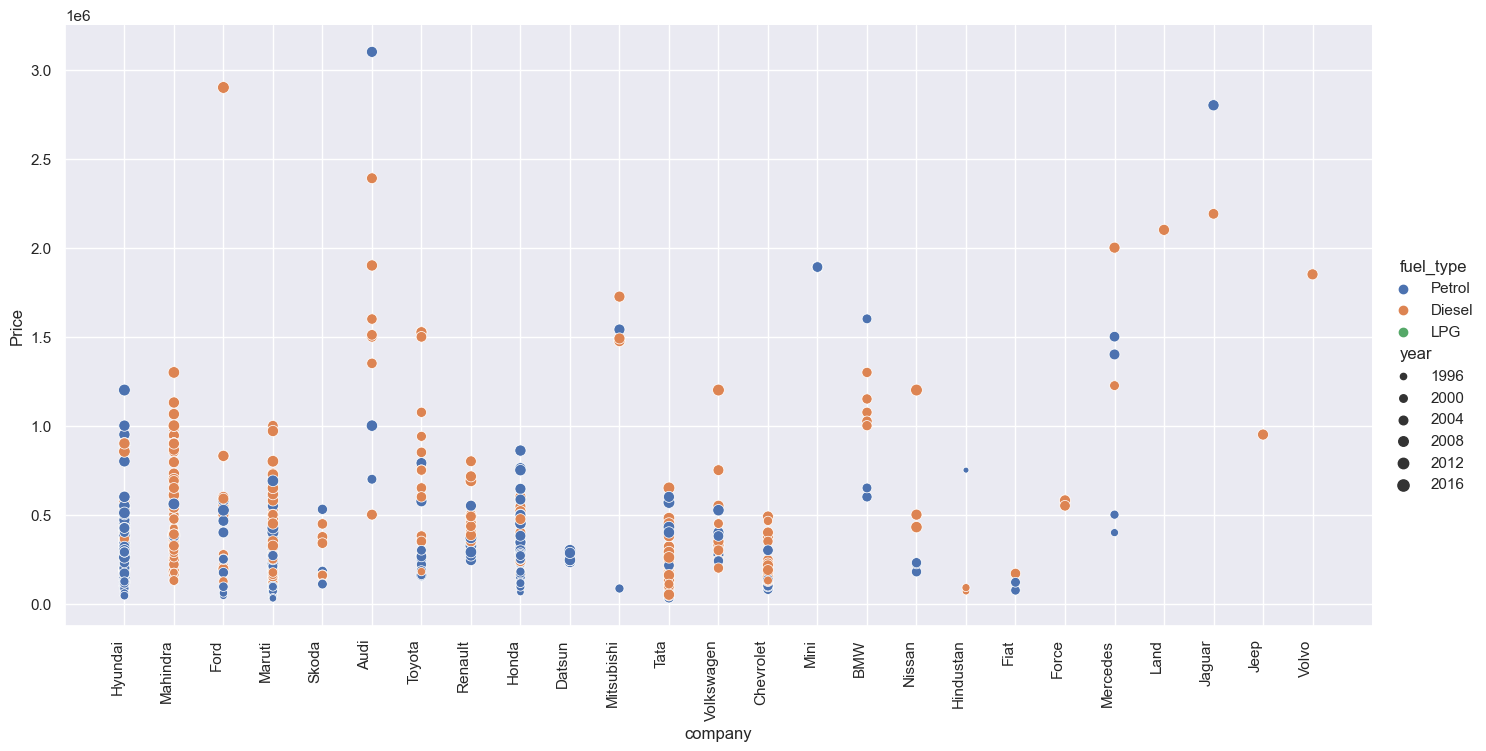

In [29]:
sns.set(style="darkgrid")
ax=sns.relplot(x='company',y='Price',data=data,hue='fuel_type',size='year',height=7,aspect=2);
ax.set_xticklabels(rotation=90,ha='right');

### 5] Separating the Input & Output labels

In [30]:
x=data[['name','company','year','kms_driven','fuel_type']]
y=data['Price']

In [31]:
x.head()

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel


In [32]:
y.head()

0     80000
1    425000
2    325000
3    575000
4    175000
Name: Price, dtype: int32

In [33]:
print(f"x shape : {x.shape}")
print(f"y shape : {y.shape}")

x shape : (815, 5)
y shape : (815,)


### 6] Train-Test Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [36]:
print(f"x_train : {x_train.shape}\nx_test : {x_test.shape}\ny_train : {y_train.shape}\ny_test : {y_test.shape}")

x_train : (652, 5)
x_test : (163, 5)
y_train : (652,)
y_test : (163,)


### 7] Training and Testing the dataset 

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

**i) Creating an OneHotEncoder object to contain all the possible categories**

In [38]:
ohe=OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

**ii) Creating a column transformer to transform categorical columns**

In [39]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

**iii) Linear Regression Model**

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr=LinearRegression()

**iv) Making a pipeline**

In [42]:
pipe=make_pipeline(column_trans,lr)

**v) Fitting the mode**

In [43]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

**vi) Testing**

In [44]:
y_pred=pipe.predict(x_test)

**vii) Checking R2 Score**

In [45]:
from sklearn.metrics import r2_score

In [46]:
r2_score(y_test,y_pred)

0.45227657279834255

**Finding the model with a random state of TrainTestSplit where the model was found to give best r2_score**

In [47]:
score=0
i_val=0
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    cur=(r2_score(y_test,y_pred))
    if(cur>score):
         score=cur
         i_val=i

In [48]:
print(f"The best r2 score is found at random state {i_val} and it is {score}")

The best r2 score is found at random state 302 and it is 0.8991157554877304


**The best model is found at a certain random state=302**

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i_val)
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
(r2_score(y_test,y_pred))

0.8991157554877304

In [50]:
import pickle

In [51]:


pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [52]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],
                          data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([456670.3272301])

In [53]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [54]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],
                          data=np.array(['Hyundai Santro Xing','Hyundai',2007,45000,'Petrol']).reshape(1,5)))

array([87625.06401173])

In [55]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese

### 7] Regression Plot

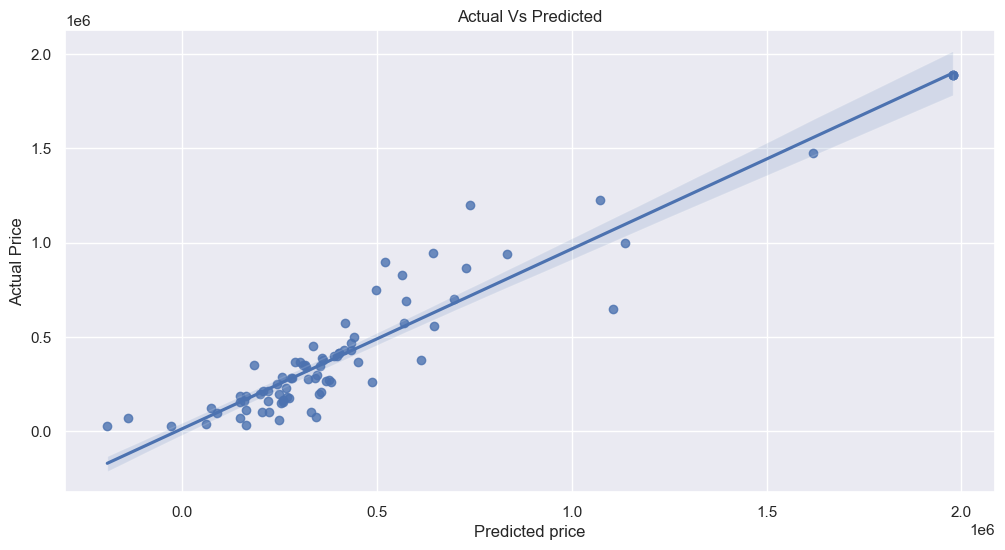

In [56]:
plt.figure(figsize=(12,6))
sns.regplot(x=y_pred,y=y_test)
plt.xlabel("Predicted price")
plt.ylabel("Actual Price")
plt.title("Actual Vs Predicted");

### 8] Making a Predictive System

In [57]:
def predictions():
    #Taking Inputs from the User
    a=(input("Car name : "))
    b=(input("Company : "))
    c=int(input("Year : "))
    d=float(input("Kilometers driven : "))
    e=(input("Fuel type : "))

    #Converting it into NumPy array
    z=np.array((a,b,c,d,e))

    #Reshape the array as we are predicting for one instance
    final_data=z.reshape(1,5)

    ot=pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=final_data))
    print(f"The predicted price of the car is : {float(ot)}")


In [58]:
data.tail()

,name,company,year,Price,kms_driven,fuel_type
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel
815,Mahindra Quanto C8,Mahindra,2013,390000,40000,Diesel


In [60]:
predictions()

Car name :  Mahindra Quanto C8
Company :  Mahindra
Year :  2013
Kilometers driven :  40000
Fuel type :  Diesel


The predicted price of the car is : 387341.2728590444


C:\Users\kaifm\AppData\Local\Temp\ipykernel_16928\3195743752.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"The predicted price of the car is : {float(ot)}")


## THANK YOU :)